## Issam Ariss
## 260714239


## Assignment 4

### 1 Dataset Overview

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
from sklearn.metrics import confusion_matrix
import cv2
import sklearn
from skimage import feature as ft
from sklearn.ensemble import RandomForestClassifier

In [2]:
# routine which will open such a file and return a dictionary:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict
#loading batch 4 to resizes the images

data_batch='./cifar-10-batches-py/data_batch_4' 
category= './cifar-10-batches-py/batches.meta'

batch4=unpickle(data_batch)
labels=unpickle(category)
    

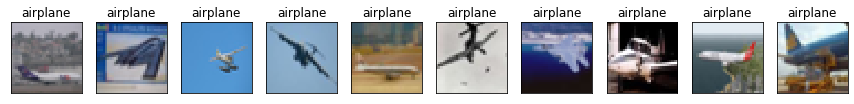

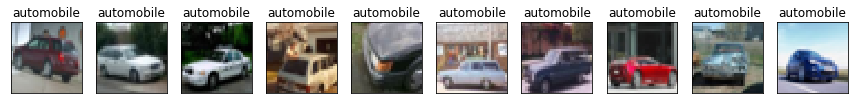

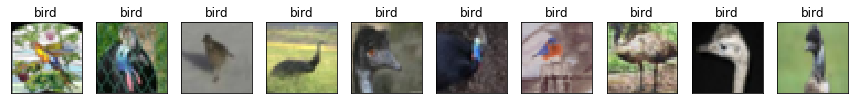

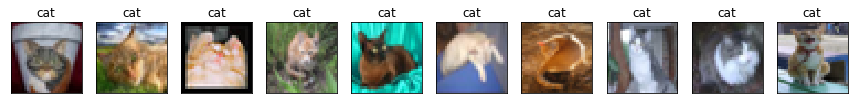

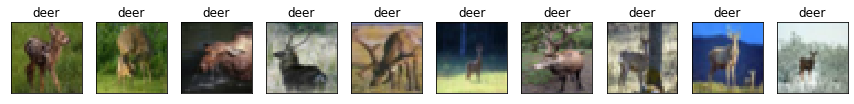

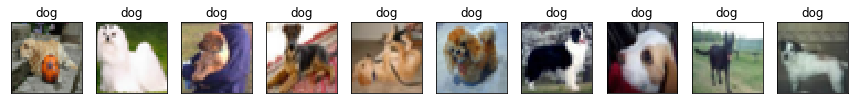

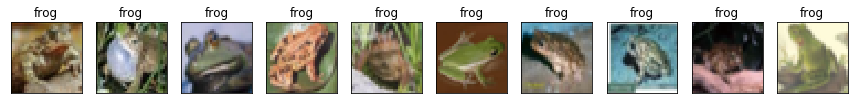

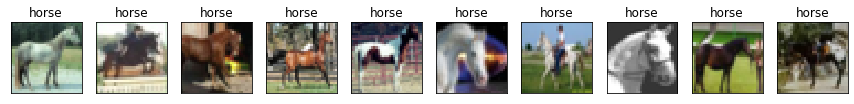

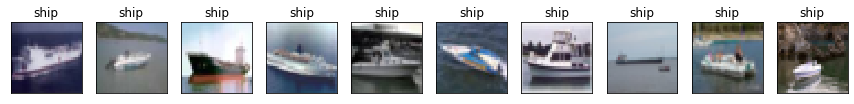

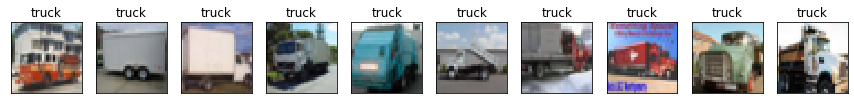

In [3]:
# defining the categories
categories = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
#resizing the images 
data = batch4[b'data'].reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8") 
j = 0 # set j to 0 to iterate through the images of data batch 4
for i in range(10):
    counter = 0 #set the counter to 0 
    plt.figure(figsize = (15,15))
    # while loop to find the number of images in each categories
    while(counter < 10):
        if(batch4[b'labels'][j] == i):
            plt.subplot(1,10,counter+1), plt.imshow(data[j])
            plt.title(labels[b'label_names'][i].decode('utf-8'))
            plt.xticks([]), plt.yticks([])
            counter += 1
        j += 1
        
    plt.show()

## Feature Extraction

### Data Batch 1

In [4]:
test_batch='./cifar-10-batches-py/test_batch'
test_raw= unpickle(test_batch)
data_batch1='./cifar-10-batches-py/data_batch_1'
batch1=unpickle(data_batch1)
lab= batch1[b'labels']
test_lab=test_raw[b'labels']

## Mean Intensity & HoG functions

In [5]:
# defining the mean intensity function that inputs the data  (10000,3072)
'function to extract features with mean intensity.'
def mean_intensity(raw_data): 
    images=10000; #total images
    features = [] # outputed array
    for i in range(images):
            for j in range(3):
                mean_RGB = []
                mean_RGB.append(np.mean(raw_data[i][0:1024])) # mean red pixels
                mean_RGB.append(np.mean(raw_data[i][1024:2048])) # mean green pixels
                mean_RGB.append(np.mean(raw_data[i][2048:3072])) # mean blue pixels
            features.append(mean_RGB)

    return np.asarray(features)

In [6]:
# defining hog function
def HoG_feat(images,cell_size=(8,8),block_size=(2,2),nbins=9):
    cell_size=(8,8);
    block_size=(2,2);
    nbins=9;
    
    hog_features = [None] * len(images)
    
    for i in range(len(images)):
        img = cv2.cvtColor(images[i],cv2.COLOR_RGB2GRAY)
        hog_features[i] = ft.hog(img, orientations=9, pixels_per_cell=(8, 8),
                   cells_per_block=(2, 2),block_norm='L2-Hys')
        
    return (hog_features)

## Linear SVM

#### Mean Intensity

Accuracy of SVM with Mean intensity: 0.2405


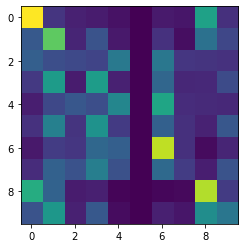

In [7]:
training_intensity = mean_intensity(batch1[b'data'])
  
# Create an Instance of SVM and Fit out the data. 
# Data is not scaled so as to be able to plot the support vectors 
clf = svm.SVC(gamma='scale',kernel='linear') # precising that the kernel is linear
clf.fit(training_intensity, lab)

testing_intensity = mean_intensity(test_raw[b'data'])
prediction_test = clf.predict(testing_intensity) # test prediction

correct_predictions=0; #seting the correct prediction  0
total_predictions=10000; # number of total predictions

#forloop to compare the correct number of predictions
for i in range(len(prediction_test)):
    if(prediction_test[i]==test_lab[i]):
        correct_predictions=correct_predictions+1
accuracy =(correct_predictions/total_predictions); #determining the accuracy
print("Accuracy of SVM with Mean intensity:",accuracy)

# Create the confusion matrix using the function:
conf = confusion_matrix(test_raw[b'labels'],prediction_test)

# plotting confusion matrix
plt.figure()
plt.imshow(conf)
plt.show()

### HoG

In [8]:
#reshape
data_1 = batch1[b'data'].reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8") 
data_t1 = test_raw[b'data'].reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8") 

Accuracy of SVM with HoG: 0.4924


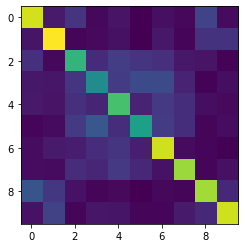

In [9]:
# calling HoG function
training_HoG = HoG_feat(data_1)
np.asarray(training_HoG)
# set kernel to linear
clf = svm.SVC(gamma='scale',kernel='linear')
clf.fit(training_HoG , batch1[b'labels'])

testing_HoG = HoG_feat(data_t1)
prediction_test = clf.predict(testing_HoG) # test prediction

correct_predictions=0; #seting the correct prediction  0
total_predictions=10000; # number of total predictions

#forloop to compare the correct number of predictions
for i in range(len(prediction_test)):
    if(prediction_test[i]==test_raw[b'labels'][i]):
        correct_predictions=correct_predictions+1
accuracy = correct_predictions/total_predictions; #determining the accuracy
print("Accuracy of SVM with HoG:",accuracy)

# Create the confusion matrix using the function:
conf = confusion_matrix(test_raw[b'labels'],prediction_test)

# plotting confusion matrix
plt.figure()
plt.imshow(conf)
plt.show()

## Non-linear SVMs

#### Kernel = Polynomial

Accuracy of Non-linear SVM with HoG: 0.5486


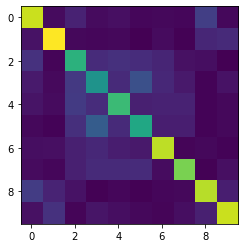

In [10]:
# calling HoG function
training_HoG = HoG_feat(data_1)
np.asarray(training_HoG)
# set kernel to polynomial
clf = svm.SVC(gamma='scale',kernel='poly')
clf.fit(training_HoG , batch1[b'labels'])

testing_HoG = HoG_feat(data_t1)
prediction_test = clf.predict(testing_HoG) # test prediction

correct_predictions=0; #seting the correct prediction  0
total_predictions=10000; # number of total predictions

#forloop to compare the correct number of predictions
for i in range(len(prediction_test)):
    if(prediction_test[i]==test_raw[b'labels'][i]):
        correct_predictions=correct_predictions+1
accuracy = correct_predictions/total_predictions; #determining the accuracy
print("Accuracy of Non-linear SVM with HoG:",accuracy)

# Create the confusion matrix using the function:
conf = confusion_matrix(test_raw[b'labels'],prediction_test)

# plotting confusion matrix
plt.figure()
plt.imshow(conf)
plt.show()

#### Kernel = rbf

Accuracy of Non-linear SVM with HoG: 0.5618


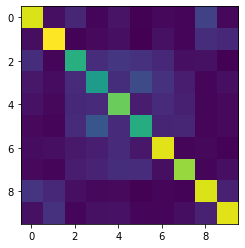

In [11]:
# calling HoG function
training_HoG = HoG_feat(data_1)
np.asarray(training_HoG)
# set kernel to rbf
clf = svm.SVC(gamma='scale',kernel='rbf')
clf.fit(training_HoG , batch1[b'labels'])

testing_HoG = HoG_feat(data_t1)
prediction_test = clf.predict(testing_HoG) # test prediction

correct_predictions=0; #seting the correct prediction  0
total_predictions=10000; # number of total predictions

#forloop to compare the correct number of predictions
for i in range(len(prediction_test)):
    if(prediction_test[i]==test_raw[b'labels'][i]):
        correct_predictions=correct_predictions+1
accuracy = correct_predictions/total_predictions; #determining the accuracy
print("Accuracy of Non-linear SVM with HoG:",accuracy)

# Create the confusion matrix using the function:
conf = confusion_matrix(test_raw[b'labels'],prediction_test)

# plotting confusion matrix
plt.figure()
plt.imshow(conf)
plt.show()

## Random Forest Classifiers

### RF - Exploring Performance of HoG Features

Accuracy of Random Forest Classifier with HoG: 0.4613


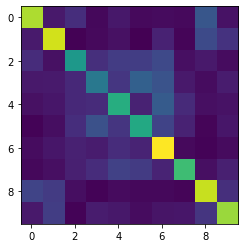

In [12]:
# calling HoG function
training_HoG = HoG_feat(data_1)
np.asarray(training_HoG)
# random forest classifer
clf = RandomForestClassifier(n_estimators=100, criterion='entropy')
clf.fit(training_HoG , batch1[b'labels'])

testing_HoG = HoG_feat(data_t1)
prediction_test = clf.predict(testing_HoG) # test prediction

correct_predictions=0; #seting the correct prediction  0
total_predictions=10000; # number of total predictions

#forloop to compare the correct number of predictions
for i in range(len(prediction_test)):
    if(prediction_test[i]==test_raw[b'labels'][i]):
        correct_predictions=correct_predictions+1
accuracy = correct_predictions/total_predictions; #determining the accuracy
print("Accuracy of Random Forest Classifier with HoG:",accuracy)

# Create the confusion matrix using the function:
conf = confusion_matrix(test_raw[b'labels'],prediction_test)

# plotting confusion matrix
plt.figure()
plt.imshow(conf)
plt.show()

### Experiment 1: Trees= 40

Accuracy of Random Forest Classifier with HoG: 0.4095


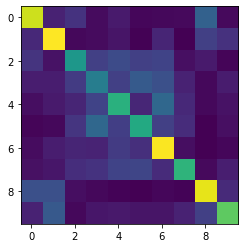

In [13]:
# calling HoG function
training_HoG = HoG_feat(data_1)
np.asarray(training_HoG)
# random forest classifer
clf = RandomForestClassifier(n_estimators=40, criterion='entropy')
clf.fit(training_HoG , batch1[b'labels'])

testing_HoG = HoG_feat(data_t1)
prediction_test = clf.predict(testing_HoG) # test prediction

correct_predictions=0; #seting the correct prediction  0
total_predictions=10000; # number of total predictions

#forloop to compare the correct number of predictions
for i in range(len(prediction_test)):
    if(prediction_test[i]==test_raw[b'labels'][i]):
        correct_predictions=correct_predictions+1
accuracy = correct_predictions/total_predictions; #determining the accuracy
print("Accuracy of Random Forest Classifier with HoG:",accuracy)

# Create the confusion matrix using the function:
conf = confusion_matrix(test_raw[b'labels'],prediction_test)

# plotting confusion matrix
plt.figure()
plt.imshow(conf)
plt.show()

### Experiment 2: Trees= 200

Accuracy of Random Forest Classifier with HoG: 0.4754


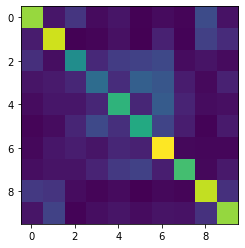

In [14]:
# calling HoG function
training_HoG = HoG_feat(data_1)
np.asarray(training_HoG)
# random forest classifer
clf = RandomForestClassifier(n_estimators=200, criterion='entropy')
clf.fit(training_HoG , batch1[b'labels'])

testing_HoG = HoG_feat(data_t1)
prediction_test = clf.predict(testing_HoG) # test prediction

correct_predictions=0; #seting the correct prediction  0
total_predictions=10000; # number of total predictions

#forloop to compare the correct number of predictions
for i in range(len(prediction_test)):
    if(prediction_test[i]==test_raw[b'labels'][i]):
        correct_predictions=correct_predictions+1
accuracy = correct_predictions/total_predictions; #determining the accuracy
print("Accuracy of Random Forest Classifier with HoG:",accuracy)

# Create the confusion matrix using the function:
conf = confusion_matrix(test_raw[b'labels'],prediction_test)

# plotting confusion matrix
plt.figure()
plt.imshow(conf)
plt.show()

### Experiment 3: Trees= 250

Accuracy of Random Forest Classifier with HoG: 0.4855


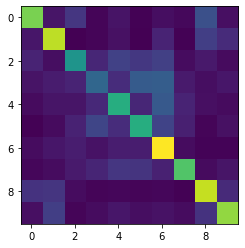

In [15]:
# calling HoG function
training_HoG = HoG_feat(data_1)
np.asarray(training_HoG)
# random forest classifer
clf = RandomForestClassifier(n_estimators=250, criterion='entropy')
clf.fit(training_HoG , batch1[b'labels'])

testing_HoG = HoG_feat(data_t1)
prediction_test = clf.predict(testing_HoG) # test prediction

correct_predictions=0; #seting the correct prediction  0
total_predictions=10000; # number of total predictions

#forloop to compare the correct number of predictions
for i in range(len(prediction_test)):
    if(prediction_test[i]==test_raw[b'labels'][i]):
        correct_predictions=correct_predictions+1
accuracy = correct_predictions/total_predictions; #determining the accuracy
print("Accuracy of Random Forest Classifier with HoG:",accuracy)

# Create the confusion matrix using the function:
conf = confusion_matrix(test_raw[b'labels'],prediction_test)

# plotting confusion matrix
plt.figure()
plt.imshow(conf)
plt.show()

 Yes, one can see an increase in classification performance with an increase in the number of trees. By increasing the number of trees, the accuracy increases. For n_trees=250 we get the highest accuracy

## Comparison of Classifiers

### 4.1 )Performance Analysis

As you can see from the accuracy results regarding the different classifiers with the different numbers of tress, one can tell that increasing the number of tress increases the accuracy. In fact, for n_trees= 250 we get an accuracy of 48.23% which is greater than 47.8% for n_trees=200. Concerning the SVM classifier, the accuracy increases for the non-linear case with kernel=polynomial.

Accuracy of Non-linear SVM with HoG: 0.8115


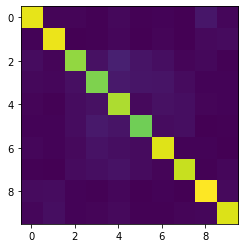

In [16]:
# training with training and predicting with training set
# calling HoG function
training_HoG = HoG_feat(data_1)
np.asarray(training_HoG)
# set kernel to rbf
clf = svm.SVC(gamma='scale',kernel='rbf')
clf.fit(training_HoG , batch1[b'labels'])

testing_HoG = HoG_feat(data_1)
prediction_test = clf.predict(testing_HoG) # prediction with the training set

correct_predictions=0; #seting the correct prediction  0
total_predictions=10000; # number of total predictions

#forloop to compare the correct number of predictions
for i in range(len(prediction_test)):
    if(prediction_test[i]==batch1[b'labels'][i]):
        correct_predictions=correct_predictions+1
accuracy = correct_predictions/total_predictions; #determining the accuracy
print("Accuracy of Non-linear SVM with HoG:",accuracy)

# Create the confusion matrix using the function:
conf = confusion_matrix(batch1[b'labels'],prediction_test)

# plotting confusion matrix
plt.figure()
plt.imshow(conf)
plt.show()

Accuracy of Random Forest Classifier with HoG: 1.0


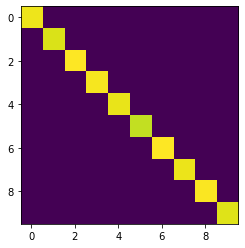

In [34]:
# training with training and predicting with training set
# calling HoG function
training_HoG = HoG_feat(data_1)
np.asarray(training_HoG)
# random forest classifer
clf = RandomForestClassifier(n_estimators=250, criterion='entropy')
clf.fit(training_HoG , batch1[b'labels'])

testing_HoG = HoG_feat(data_1)
prediction_test = clf.predict(testing_HoG) # prediction with the training set

correct_predictions=0; #seting the correct prediction  0
total_predictions=10000; # number of total predictions

#forloop to compare the correct number of predictions
for i in range(len(prediction_test)):
    if(prediction_test[i]==batch1[b'labels'][i]):
        correct_predictions=correct_predictions+1
accuracy = correct_predictions/total_predictions; #determining the accuracy
print("Accuracy of Random Forest Classifier with HoG:",accuracy)

# Create the confusion matrix using the function:
conf = confusion_matrix(batch1[b'labels'],prediction_test)

# plotting confusion matrix
plt.figure()
plt.imshow(conf)
plt.show()

### 4.2) Exploring Different Parameters of HoG

### New HoG function with different number of orientation bins

In [18]:
'New HoG function with different number of orientation bins'
def HoG_feat_SVM_nbins(images,cell_size=(8,8),block_size=(2,2),nbins=15):
    cell_size=(8,8);
    block_size=(2,2);
    nbins=15;
    
    hog_features_nbins = [None] * len(images)
    
    for i in range(len(images)):
        img = cv2.cvtColor(images[i],cv2.COLOR_RGB2GRAY)
        hog_features_nbins[i] = ft.hog(img, orientations=15, pixels_per_cell=(8, 8),
                   cells_per_block=(2, 2),block_norm='L2-Hys')
        
    return (hog_features_nbins)

Accuracy of Non-linear SVM with Kernel= rbf and Nbins=15: 0.5596


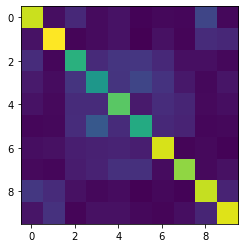

In [19]:
# calling HoG function
training_HoG_nbins = HoG_feat_SVM_nbins(data_1)
np.asarray(training_HoG_nbins)
# set kernel to rbf
clf_nbins = svm.SVC(gamma='scale',kernel='rbf')
clf_nbins.fit(training_HoG_nbins , batch1[b'labels'])

testing_HoG_nbins = HoG_feat_SVM_nbins(data_t1)
prediction_test = clf_nbins.predict(testing_HoG_nbins) # test prediction

correct_predictions=0; #seting the correct prediction  0
total_predictions=10000; # number of total predictions

#forloop to compare the correct number of predictions
for i in range(len(prediction_test)):
    if(prediction_test[i]==test_raw[b'labels'][i]):
        correct_predictions=correct_predictions+1
accuracy = correct_predictions/total_predictions; #determining the accuracy
print("Accuracy of Non-linear SVM with Kernel= rbf and Nbins=15:",accuracy)

# Create the confusion matrix using the function:
conf_nbins = confusion_matrix(test_raw[b'labels'],prediction_test)

# plotting confusion matrix
plt.figure()
plt.imshow(conf_nbins)
plt.show()

### New HoG function with different cell size

In [20]:
'New HoG function with different cell size'
def HoG_feat_SVM_cell(images,cell_size=(12,12),block_size=(2,2),nbins=9):
    cell_size=(12,12);
    block_size=(2,2);
    nbins=9;
    
    hog_features_cell = [None] * len(images)
    
    for i in range(len(images)):
        img = cv2.cvtColor(images[i],cv2.COLOR_RGB2GRAY)
        hog_features_cell[i] = ft.hog(img, orientations=9, pixels_per_cell=(12, 12),
                   cells_per_block=(2, 2),block_norm='L2-Hys')
        
    return (hog_features_cell)

Accuracy of Non-linear SVM with Kernel= rbf and Cell size = (12,12): 0.4333


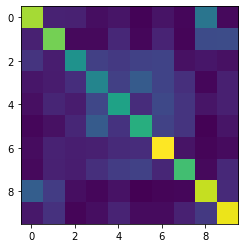

In [21]:
# calling HoG function
training_HoG_cell = HoG_feat_SVM_cell(data_1)
np.asarray(training_HoG_cell)
# set kernel to rbf
clf_cell = svm.SVC(gamma='scale',kernel='rbf')
clf_cell.fit(training_HoG_cell , batch1[b'labels'])

testing_HoG_cell = HoG_feat_SVM_cell(data_t1)
prediction_test = clf_cell.predict(testing_HoG_cell) # test prediction

correct_predictions=0; #seting the correct prediction  0
total_predictions=10000; # number of total predictions

#forloop to compare the correct number of predictions
for i in range(len(prediction_test)):
    if(prediction_test[i]==test_raw[b'labels'][i]):
        correct_predictions=correct_predictions+1
accuracy = correct_predictions/total_predictions; #determining the accuracy
print("Accuracy of Non-linear SVM with Kernel= rbf and Cell size = (12,12):",accuracy)

# Create the confusion matrix using the function:
conf_cell = confusion_matrix(test_raw[b'labels'],prediction_test)

# plotting confusion matrix
plt.figure()
plt.imshow(conf_cell)
plt.show()

### New HoG function with different block size

In [22]:
'New HoG function with different block size which turns out to be the best one'
def HoG_feat_bp(images,cell_size=(8,8),block_size=(4,4),nbins=9):
    cell_size=(8,8);
    block_size=(4,4);
    nbins=9;
    
    hog_features_bp = [None] * len(images)
    
    for i in range(len(images)):
        img = cv2.cvtColor(images[i],cv2.COLOR_RGB2GRAY)
        hog_features_bp[i] = ft.hog(img, orientations=9, pixels_per_cell=(8, 8),
                   cells_per_block=(4, 4),block_norm='L2-Hys')
        
    return (hog_features_bp)

Accuracy of Non-linear SVM with Kernel= rbf and Block size = (4,4): 0.5717


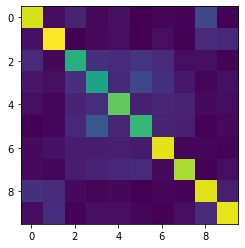

In [23]:
# calling HoG function
training_HoG_block = HoG_feat_bp(data_1)
np.asarray(training_HoG_block)
# set kernel to rbf
clf_block = svm.SVC(gamma='scale',kernel='rbf')
clf_block.fit(training_HoG_block , batch1[b'labels'])

testing_HoG_block = HoG_feat_bp(data_t1)
prediction_test = clf_block.predict(testing_HoG_block) # test prediction

correct_predictions=0; #seting the correct prediction  0
total_predictions=10000; # number of total predictions

#forloop to compare the correct number of predictions
for i in range(len(prediction_test)):
    if(prediction_test[i]==test_raw[b'labels'][i]):
        correct_predictions=correct_predictions+1
accuracy = correct_predictions/total_predictions; #determining the accuracy
print("Accuracy of Non-linear SVM with Kernel= rbf and Block size = (4,4):",accuracy)

# Create the confusion matrix using the function:
conf_block = confusion_matrix(test_raw[b'labels'],prediction_test)

# plotting confusion matrix
plt.figure()
plt.imshow(conf_block)
plt.show()

For this part, the tree experiments done consisted of varying one parameter at each time. The initial parameter  are those given in the previous section, and this time we increased the number of bins for the first one, the cell size for the second one and the block size for the last one.

By fixing cell_size=(8,8) & block_size=(2,2) and increasing n_bins to 15, one can tell that the accuracy decreased very slightly. It decreased from 0.5618 (for cell_size=(8,8)& block_size=(4,4),n_bins=9) to 0.5596. We conclude that increasing the number of bins decreases the accuracy. Even by testing other cases with an increase of number of orientation bins, the accuracy decreases slightly.

By fixing n_bins=9 & block_size=(2,2) and increasing cell_size=(12,12), one can tell that the accuracy decreased tremendously. It decreased from 0.5618 (for cell_size=(8,8)& block_size=(2,2),n_bins=9) to 0.4333. We conclude that increasing the cell size decreases the accuracy.

By fixing n_bins=9 & cell_size=(8,8) and increasing block_size=(4,4), one can tell that the accuracy increases . It increases from 0.5618 (for cell_size=(8,8)& block_size=(2,2),n_bins=9) to 0.5717. We conclude that increasing the block size increases the accuracy.




### 4.3) Folded Validation

#### Data Batch 4

In [24]:
test_batch4='./cifar-10-batches-py/test_batch'
test_raw4= unpickle(test_batch4)
data_batch4='./cifar-10-batches-py/data_batch_4'
batch4=unpickle(data_batch4)
lab4= batch4[b'labels']
test_lab4=test_raw4[b'labels']
#reshape
data_4 = batch4[b'data'].reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8") 
data_t4 = test_raw4[b'data'].reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8") 

Best HoG parameters accuracy with Kernel=rbf: 0.5613


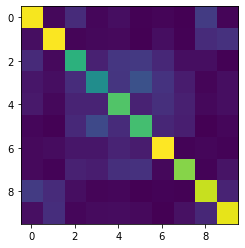

In [25]:
 #Best performing HoG features were with the HoG function with an increased block size
#so we are going to use it for this part

# calling HoG function with the best paramters
training_HoG_block4 = HoG_feat_bp(data_4)
np.asarray(training_HoG_block4)
# set kernel to rbf
clf_block4 = svm.SVC(gamma='scale',kernel='rbf')
clf_block4.fit(training_HoG_block4 , batch4[b'labels'])

testing_HoG_block4 = HoG_feat_bp(data_t4)
prediction_test = clf_block4.predict(testing_HoG_block4) # test prediction

correct_predictions=0; #seting the correct prediction  0
total_predictions=10000; # number of total predictions

#forloop to compare the correct number of predictions
for i in range(len(prediction_test)):
    if(prediction_test[i]==test_raw4[b'labels'][i]):
        correct_predictions=correct_predictions+1
accuracy = correct_predictions/total_predictions; #determining the accuracy
print("Batch 4:Best HoG parameters accuracy with Kernel=rbf:",accuracy)

# Create the confusion matrix using the function:
conf_block4 = confusion_matrix(test_raw4[b'labels'],prediction_test)

# plotting confusion matrix
plt.figure()
plt.imshow(conf_block4)
plt.show()

Best HoG parameters accuracy with Random Forest Classifier 0.4823


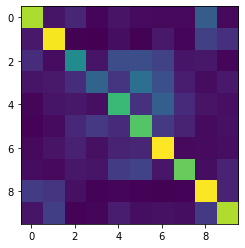

In [26]:
# calling HoG function
training_HoG = HoG_feat_bp(data_4)
np.asarray(training_HoG)
# random forest classifier
clf = RandomForestClassifier(n_estimators=250, criterion='entropy')
clf.fit(training_HoG , batch4[b'labels'])

testing_HoG = HoG_feat_bp(data_t4)
prediction_test = clf.predict(testing_HoG) # test prediction

correct_predictions=0; #seting the correct prediction  0
total_predictions=10000; # number of total predictions

#forloop to compare the correct number of predictions
for i in range(len(prediction_test)):
    if(prediction_test[i]==test_raw4[b'labels'][i]):
        correct_predictions=correct_predictions+1
accuracy = correct_predictions/total_predictions; #determining the accuracy
print("Batch 4:Best HoG parameters accuracy with Random Forest Classifier",accuracy)

# Create the confusion matrix using the function:
conf = confusion_matrix(test_raw4[b'labels'],prediction_test)

# plotting confusion matrix
plt.figure()
plt.imshow(conf)
plt.show()

#### Data Batch 2

In [27]:
test_batch2='./cifar-10-batches-py/test_batch'
test_raw2= unpickle(test_batch4)
data_batch2='./cifar-10-batches-py/data_batch_2'
batch2=unpickle(data_batch2)
lab2= batch2[b'labels']
test_lab2=test_raw2[b'labels']
#reshape
data_2= batch2[b'data'].reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8") 
data_t2 = test_raw2[b'data'].reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")

Best HoG parameters accuracy with Kernel=rbf: 0.5594


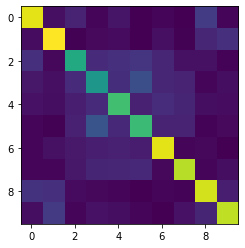

In [28]:
#Best performing HoG features were with the HoG function with an increased block size
#so we are going to use it for this part

# calling HoG function with the best paramters
training_HoG_block2 = HoG_feat_bp(data_2)
np.asarray(training_HoG_block2)
# set kernel to rbf
clf_block2 = svm.SVC(gamma='scale',kernel='rbf')
clf_block2.fit(training_HoG_block2 , batch2[b'labels'])

testing_HoG_block2 = HoG_feat_bp(data_t2)
prediction_test = clf_block2.predict(testing_HoG_block2) # test prediction

correct_predictions=0; #seting the correct prediction  0
total_predictions=10000; # number of total predictions

#forloop to compare the correct number of predictions
for i in range(len(prediction_test)):
    if(prediction_test[i]==test_raw2[b'labels'][i]):
        correct_predictions=correct_predictions+1
accuracy = correct_predictions/total_predictions; #determining the accuracy
print("Batch 2:Best HoG parameters accuracy with Kernel=rbf:",accuracy)

# Create the confusion matrix using the function:
conf_block2 = confusion_matrix(test_raw2[b'labels'],prediction_test)

# plotting confusion matrix
plt.figure()
plt.imshow(conf_block2)
plt.show()

Best HoG parameters accuracy with Random Forest Classifier: 0.4775


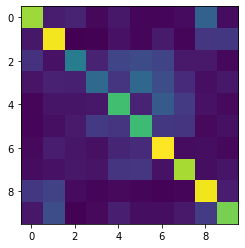

In [30]:
#Best performing HoG features were with the HoG function with an increased block size
#so we are going to use it for this part

# calling HoG function with the best paramters
training_HoG_block2 = HoG_feat_bp(data_2)
np.asarray(training_HoG_block2)
# set kernel to rbf
clf_block2 = RandomForestClassifier(n_estimators=250, criterion='entropy')
clf_block2.fit(training_HoG_block2 , batch2[b'labels'])

testing_HoG_block2 = HoG_feat_bp(data_t2)
prediction_test = clf_block2.predict(testing_HoG_block2) # test prediction

correct_predictions=0; #seting the correct prediction  0
total_predictions=10000; # number of total predictions

#forloop to compare the correct number of predictions
for i in range(len(prediction_test)):
    if(prediction_test[i]==test_raw2[b'labels'][i]):
        correct_predictions=correct_predictions+1
accuracy = correct_predictions/total_predictions; #determining the accuracy
print("Batch 2: Best HoG parameters accuracy with Random Forest Classifier:",accuracy)

# Create the confusion matrix using the function:
conf_block2 = confusion_matrix(test_raw2[b'labels'],prediction_test)

# plotting confusion matrix
plt.figure()
plt.imshow(conf_block2)
plt.show()

#### Data batch 3

In [31]:
test_batch3='./cifar-10-batches-py/test_batch'
test_raw3= unpickle(test_batch4)
data_batch3='./cifar-10-batches-py/data_batch_3'
batch3=unpickle(data_batch3)
lab3= batch3[b'labels']
test_lab3=test_raw3[b'labels']
#reshape
data_3= batch3[b'data'].reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8") 
data_t3 = test_raw3[b'data'].reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")

Batch 3 : Best HoG parameters accuracy with Kernel=rbf: 0.5616


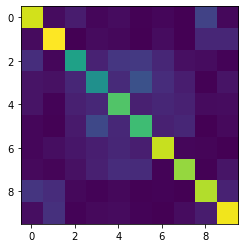

In [32]:
#Best performing HoG features were with the HoG function with an increased block size
#so we are going to use it for this part

# calling HoG function with the best paramters
training_HoG_block3 = HoG_feat_bp(data_3)
np.asarray(training_HoG_block3)
# set kernel to rbf
clf_block3 = svm.SVC(gamma='scale',kernel='rbf')
clf_block3.fit(training_HoG_block3 , batch3[b'labels'])

testing_HoG_block3 = HoG_feat_bp(data_t3)
prediction_test = clf_block3.predict(testing_HoG_block3) # test prediction

correct_predictions=0; #seting the correct prediction  0
total_predictions=10000; # number of total predictions

#forloop to compare the correct number of predictions
for i in range(len(prediction_test)):
    if(prediction_test[i]==test_raw3[b'labels'][i]):
        correct_predictions=correct_predictions+1
accuracy = correct_predictions/total_predictions; #determining the accuracy
print("Batch 3 : Best HoG parameters accuracy with Kernel=rbf:",accuracy)

# Create the confusion matrix using the function:
conf_block3 = confusion_matrix(test_raw3[b'labels'],prediction_test)

# plotting confusion matrix
plt.figure()
plt.imshow(conf_block3)
plt.show()

Batch 3: Best HoG parameters accuracy with Random Forest Classifier: 0.4869


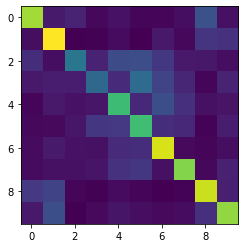

In [33]:
#Best performing HoG features were with the HoG function with an increased block size
#so we are going to use it for this part

# calling HoG function with the best paramters
training_HoG_block3 = HoG_feat_bp(data_3)
np.asarray(training_HoG_block3)
# set kernel to rbf
clf_block3 = RandomForestClassifier(n_estimators=250, criterion='entropy')
clf_block3.fit(training_HoG_block3 , batch3[b'labels'])

testing_HoG_block3 = HoG_feat_bp(data_t3)
prediction_test = clf_block3.predict(testing_HoG_block3) # test prediction

correct_predictions=0; #seting the correct prediction  0
total_predictions=10000; # number of total predictions

#forloop to compare the correct number of predictions
for i in range(len(prediction_test)):
    if(prediction_test[i]==test_raw3[b'labels'][i]):
        correct_predictions=correct_predictions+1
accuracy = correct_predictions/total_predictions; #determining the accuracy
print("Batch 3: Best HoG parameters accuracy with Random Forest Classifier:",accuracy)

# Create the confusion matrix using the function:
conf_block3 = confusion_matrix(test_raw3[b'labels'],prediction_test)

# plotting confusion matrix
plt.figure()
plt.imshow(conf_block3)
plt.show()

1) SVM with kernel=rbf:
- Batch 1: 56.18%
- Batch 2: 55.94%
- Batch 3: 56.16%
- Batch 4: 56.13%

2) Random Forest Classifier with number_trees=250
- Batch 1: 48.5%
- Batch 2: 47.75%
- Batch 3: 48.69%
- Batch 4: 48.23%

Comparing the new different batches to the batch1, we can see that the accuracies are almost equal. I do not see a higher accuracy for any particular fold.